In [ ]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

from pydicom import compat
from pydicom.valuerep import PersonNameUnicode

if compat.in_py2:
    import Tkinter as tkinter
else:
    import tkinter

print(__doc__)

default_encoding = 'iso8859'

root = tkinter.Tk()
root.geometry("%dx%d%+d%+d" % (800, 600, 0, 0))

person_names = [
    PersonNameUnicode(
        # string 앞에 b prefix : byte literal -> a sequence of octets
        b"Yamada^Tarou=\033$B;3ED\033(B^\033$BB@O:\033(B="
        b"\033$B$d$^$@\033(B^\033$B$?$m$&\033(B",
        [default_encoding, 'iso2022_jp']),  # DICOM standard 2008-PS3.5 H.3 p98
    PersonNameUnicode(
        b"Wang^XiaoDong=\xcd\xf5\x5e\xd0\xa1\xb6\xab=",
        [ 'GB18030', default_encoding]),  # DICOM standard 2008-PS3.5 J.3 p 105
    PersonNameUnicode(
        b"Wang^XiaoDong=\xe7\x8e\x8b\x5e\xe5\xb0\x8f\xe6\x9d\xb1=",
        # 아래에 default_encoding 리스트를 첫 인덱스로 포함시키면 제대로 인코딩 안됨. 뒤에로 넣으면 괜찮음
        ['UTF-8', default_encoding]),  # DICOM standard 2008-PS3.5 J.1 p 104
    PersonNameUnicode(
        b"Hong^Gildong=\033$)C\373\363^\033$)C\321\316\324\327="
        b"\033$)C\310\253^\033$)C\261\346\265\277",
        [default_encoding, 'euc_kr']),  # DICOM standard 2008-PS3.5 I.2 p 101
]
for person_name in person_names:
    print(person_name)
    label = tkinter.Label(text=person_name)
    label.pack()
root.mainloop()

Automatically created module for IPython interactive environment
Yamada^Tarou=山田^太郎=やまだ^たろう
Wang^XiaoDong=王^小东
Wang^XiaoDong=王^小東
Hong^Gildong=洪^吉洞=홍^길동


# 코드 관련
* pydicom.compat : Python2 <-> Python3 호환성 관련 
* pydicom.valuerep : DICOM VR (Value Representation). 즉, attribute의 값타입 관련 모듈 
    * PersonNameUnicode : PN (Person Name) 타입의 유니코드 버젼 / 넣은 값을 설정한 인코딩 방식에 따라 문자로 변환
    
    
Q. 
* PersonNameUnicode(val, encodings)에서 여러개의 인코딩을 넣는 경우 동작 방식? (어떤 경우는 default_encoding이 리스트 첫인덱스로 들어가도 지정한 인코딩방식으로 되고, 어떤 경우는 default_encoding 방식으로 인코딩됨) -> pydicom > charset.py 참고 (https://github.com/pydicom/pydicom/blob/master/pydicom/charset.py)

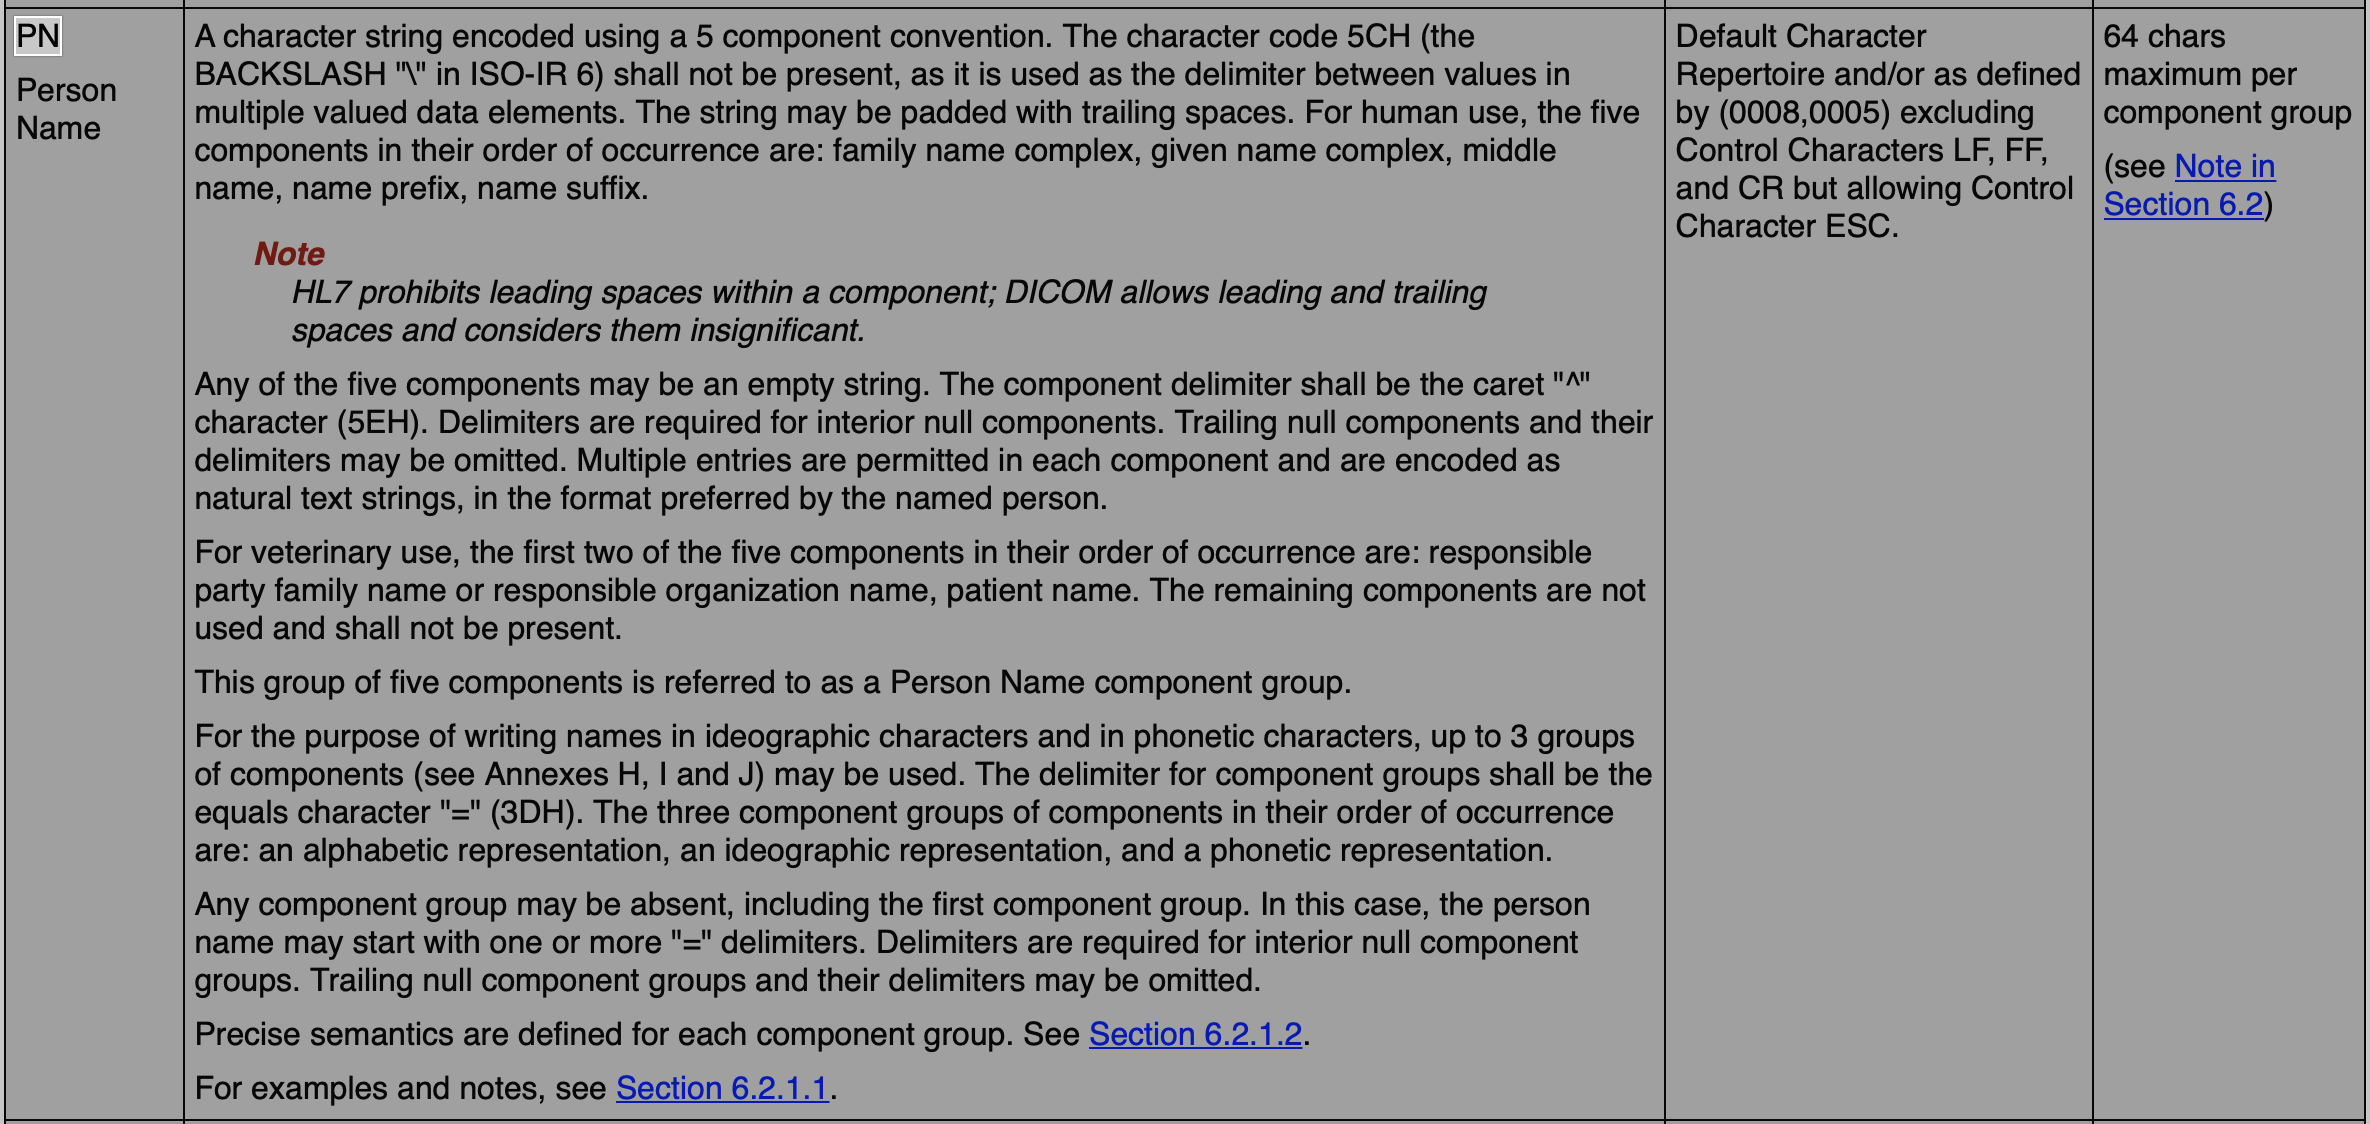

* SpecificCharacterSet(0008, 0005) attirbute은 SH, LO, ST, PN, LT, UC, UT 타입(VR)의 attribute value에 대한 문자 Character set(문자셋,캐릭터셋)을 설정할 수 있는 속성이다. 
    * https://dicom.innolitics.com/ciods/xrf-image/sop-common/00080005
    * https://ko.wikipedia.org/wiki/문자_인코딩